<a href="https://colab.research.google.com/github/sarobutt/Diabetes/blob/main/diabetes_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/diabetes_prediction_dataset 2.csv')

In [ ]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [ ]:
df.dtypes

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

In [ ]:
df.shape

(100000, 9)

# ***Data PreProcessing***

In [ ]:
import pandas as pd

def check_string_columns(df):
    string_columns = []
    for column in df.columns:
        if not pd.api.types.is_numeric_dtype(df[column]):
            string_columns.append(column)

    return string_columns

string_columns = check_string_columns(df)

print(string_columns)


['gender', 'smoking_history']


In [ ]:
unique_gender = df["gender"].unique()

print(unique_gender)

['Female' 'Male' 'Other']


# ***Converting Gender into binary variable***

In [ ]:
df["gender"] = df["gender"].replace({"Female": 0, "Male": 1, "Other":2})

# ***converting Smoking history into categorical value by mapping it manually***

In [ ]:
# Getting the unique values in the smoking_history column
unique_smoking_history = df["smoking_history"].unique()

print(unique_smoking_history)

['never' 'No Info' 'current' 'former' 'ever' 'not current']


In [ ]:
# Creating a mapping dictionary for the smoking history variable
smoking_history_mapping = {
    "never" : 1,
    "No Info" : 0,
    "current" : 2,
    "former" : 3,
    "not current" : 4,
    "ever" :5
}

In [ ]:
df["smoking_history"] = df["smoking_history"].apply(lambda x: smoking_history_mapping[x])

In [ ]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,1,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,1,27.32,5.7,158,0
3,0,36.0,0,0,2,23.45,5.0,155,0
4,1,76.0,1,1,2,20.14,4.8,155,0


# ***Checking missingness in the data, as we can see our dataset has no missing values at all***

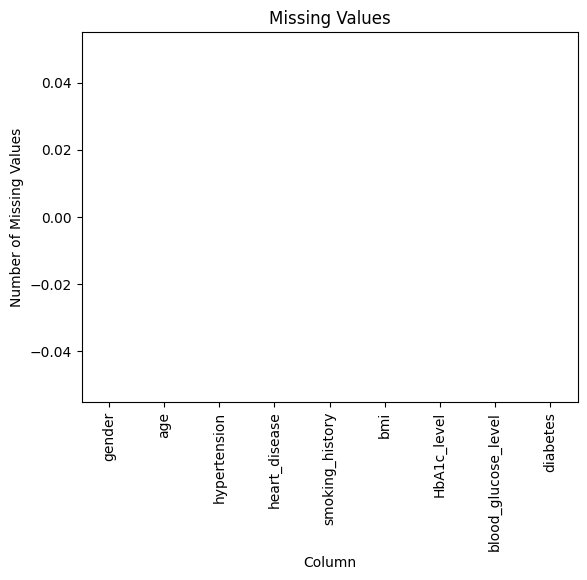

In [ ]:

import matplotlib.pyplot as plt
# Create a bar graph of missing values
missing_values = df.isnull().sum()
missing_values.plot(kind="bar")

# Add a title to the graph
plt.title("Missing Values")

# Add labels to the x-axis and y-axis
plt.xlabel("Column")
plt.ylabel("Number of Missing Values")

# Show the graph
plt.show()

# ***Checking Distribution in dataset***

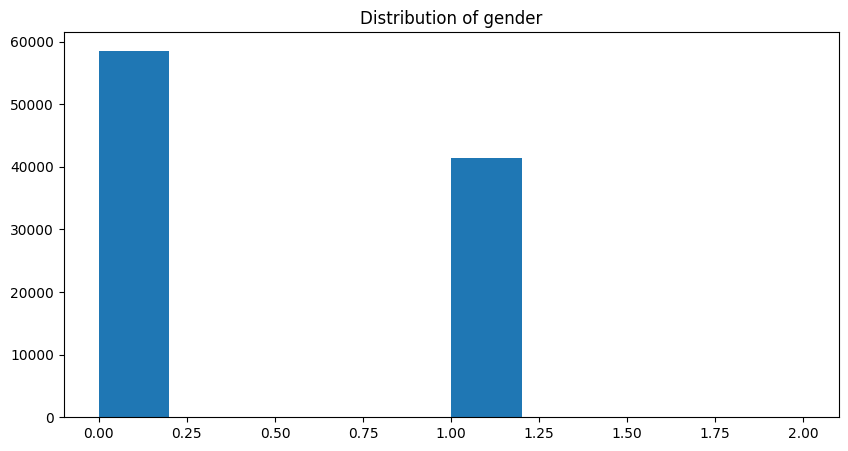

The Z-score of gender is 0       -0.841043
1       -0.841043
2        1.187228
3       -0.841043
4        1.187228
           ...   
99995   -0.841043
99996   -0.841043
99997    1.187228
99998   -0.841043
99999   -0.841043
Name: gender, Length: 100000, dtype: float64


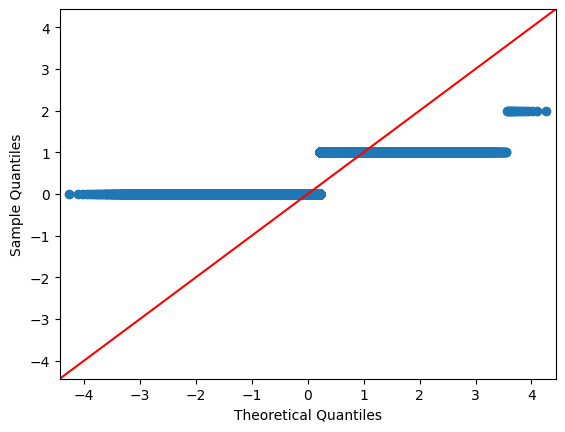

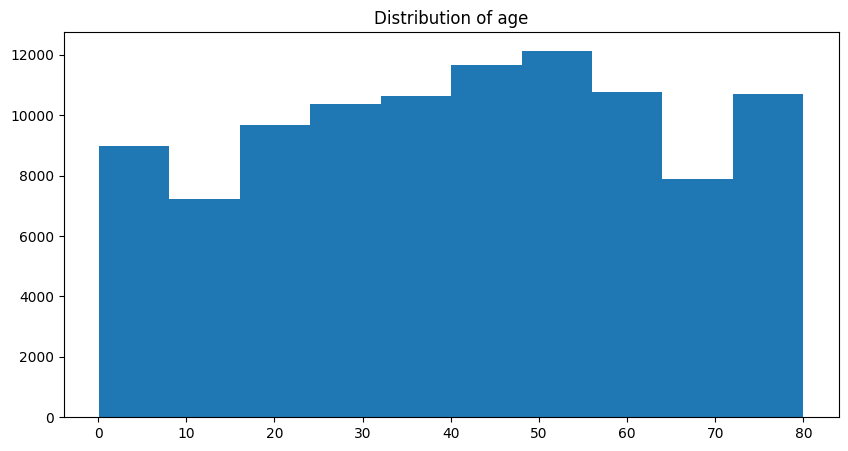

The Z-score of age is 0        1.692695
1        0.538004
2       -0.616688
3       -0.261398
4        1.515050
           ...   
99995    1.692695
99996   -1.771379
99997    1.070938
99998   -0.794332
99999    0.671237
Name: age, Length: 100000, dtype: float64


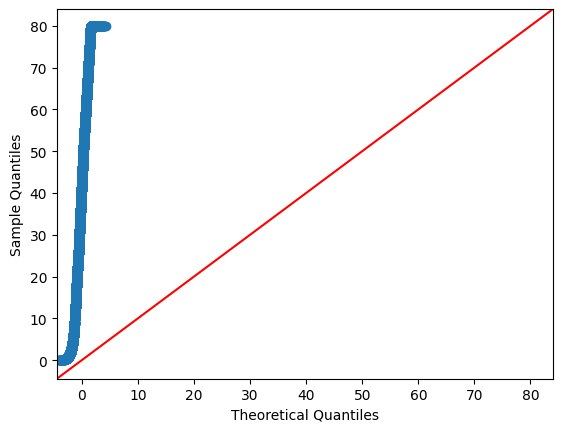

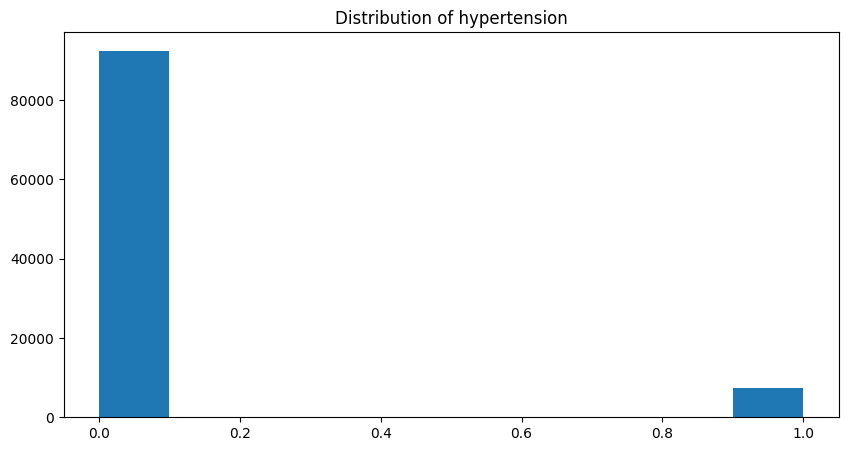

The Z-score of hypertension is 0       -0.284438
1       -0.284438
2       -0.284438
3       -0.284438
4        3.515669
           ...   
99995   -0.284438
99996   -0.284438
99997   -0.284438
99998   -0.284438
99999   -0.284438
Name: hypertension, Length: 100000, dtype: float64


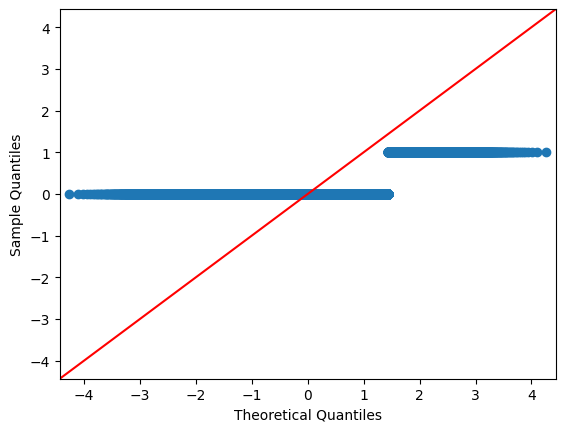

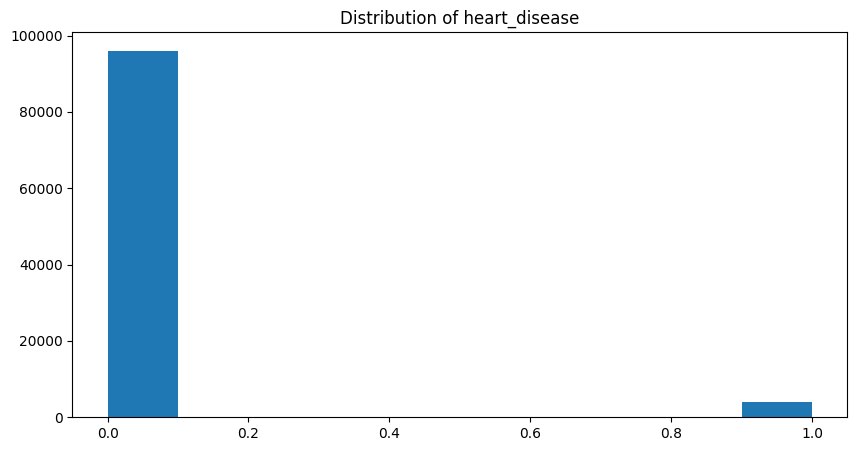

The Z-score of heart_disease is 0        4.936354
1       -0.202577
2       -0.202577
3       -0.202577
4        4.936354
           ...   
99995   -0.202577
99996   -0.202577
99997   -0.202577
99998   -0.202577
99999   -0.202577
Name: heart_disease, Length: 100000, dtype: float64


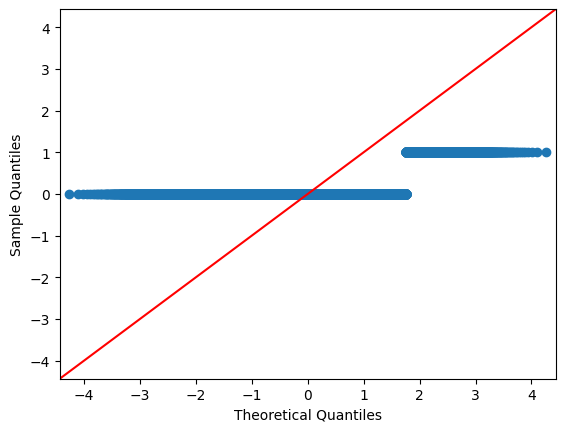

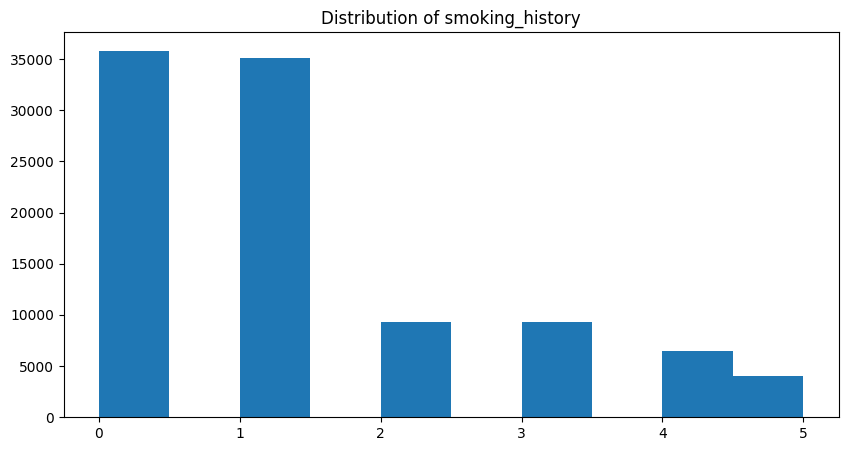

The Z-score of smoking_history is 0       -0.196141
1       -0.908576
2       -0.196141
3        0.516295
4        0.516295
           ...   
99995   -0.908576
99996   -0.908576
99997    1.228730
99998   -0.196141
99999    0.516295
Name: smoking_history, Length: 100000, dtype: float64


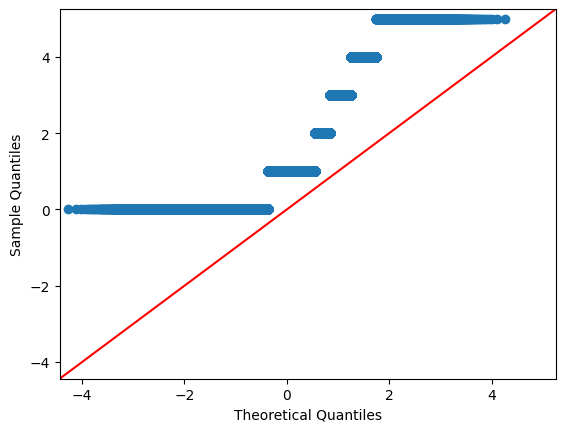

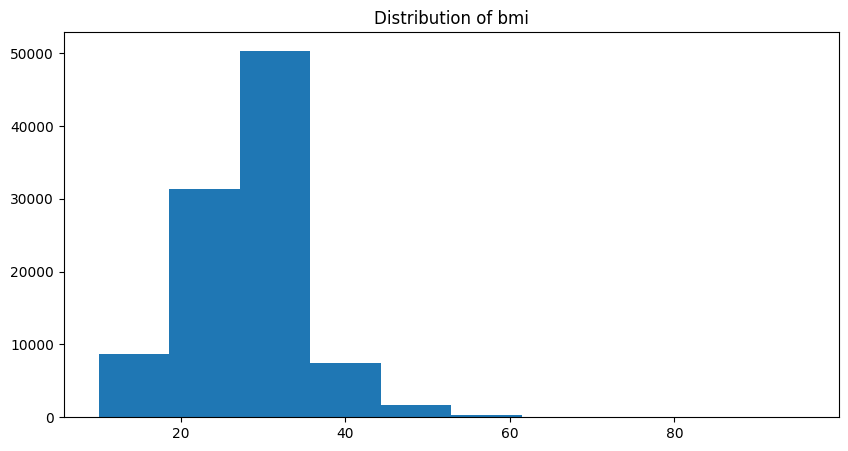

The Z-score of bmi is 0       -0.321054
1       -0.000116
2       -0.000116
3       -0.583229
4       -1.081965
           ...   
99995   -0.000116
99996   -1.499336
99997    0.076729
99998    1.220355
99999   -0.736918
Name: bmi, Length: 100000, dtype: float64


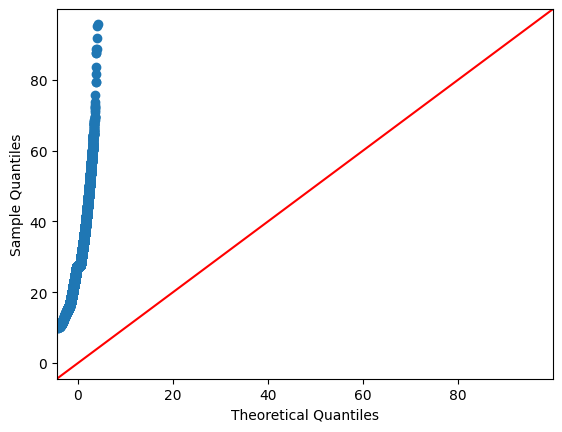

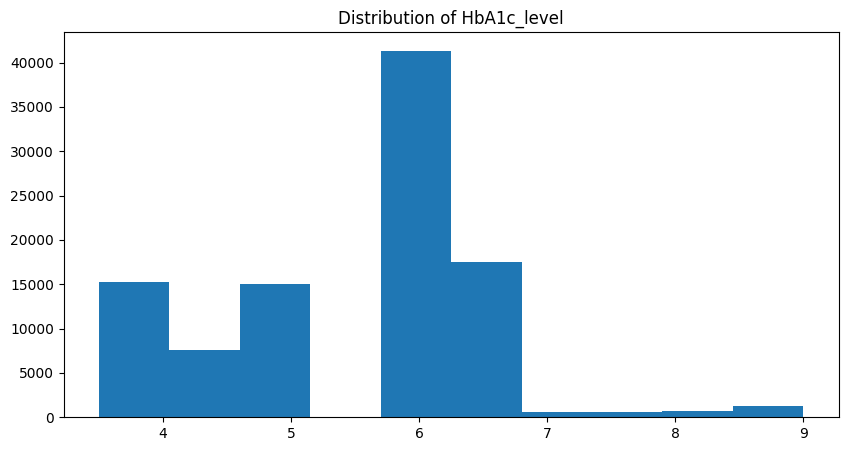

The Z-score of HbA1c_level is 0        1.001701
1        1.001701
2        0.161107
3       -0.492688
4       -0.679486
           ...   
99995    0.628104
99996    0.908301
99997    0.161107
99998   -1.426681
99999    1.001701
Name: HbA1c_level, Length: 100000, dtype: float64


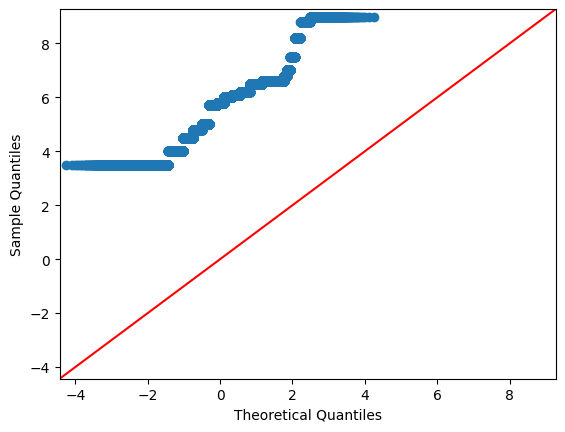

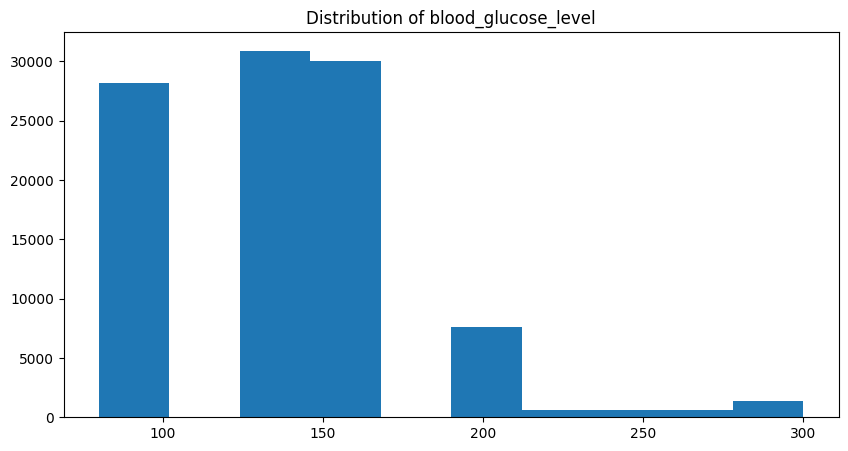

The Z-score of blood_glucose_level is 0        0.047704
1       -1.426203
2        0.489876
3        0.416181
4        0.416181
           ...   
99995   -1.180552
99996   -0.934901
99997    0.416181
99998   -0.934901
99999   -1.180552
Name: blood_glucose_level, Length: 100000, dtype: float64


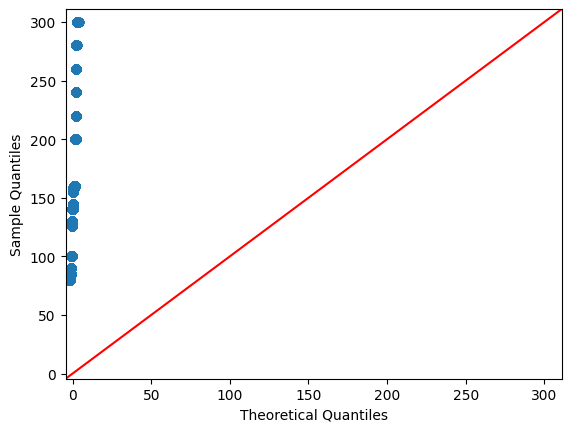

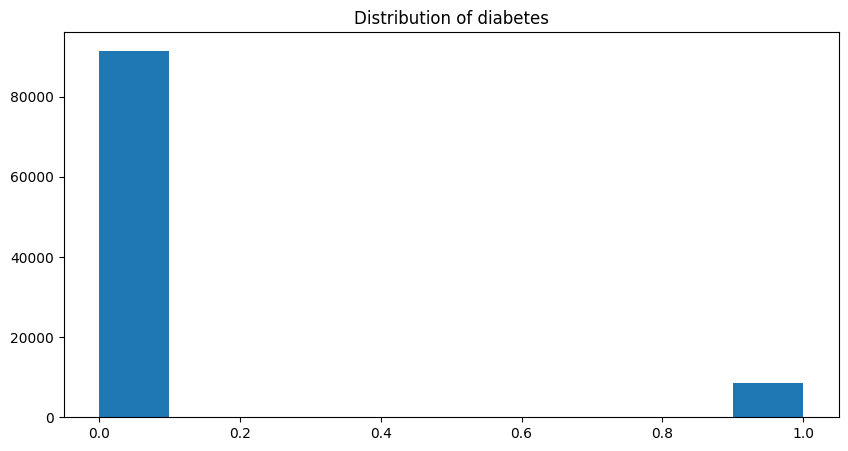

The Z-score of diabetes is 0       -0.304787
1       -0.304787
2       -0.304787
3       -0.304787
4       -0.304787
           ...   
99995   -0.304787
99996   -0.304787
99997   -0.304787
99998   -0.304787
99999   -0.304787
Name: diabetes, Length: 100000, dtype: float64


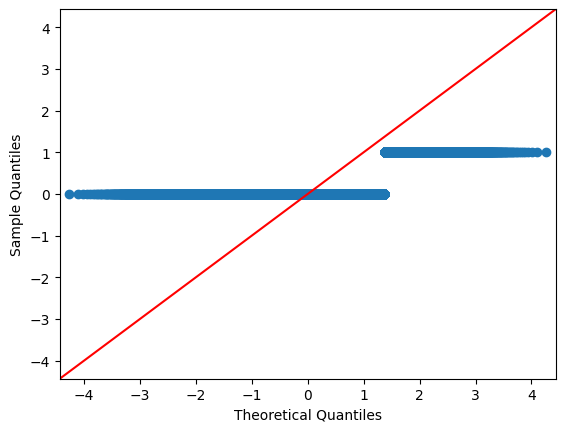

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot

def check_data_distribution(df):
    for column in df.columns:
        # Check the dtype of the column
        if not pd.api.types.is_numeric_dtype(df[column]):
            continue

        # Create a histogram of the column
        fig = plt.figure(figsize=(10, 5))
        plt.hist(df[column])
        plt.title(f"Distribution of {column}")
        plt.show()

        # Calculate the Z-score of the column
        z_score = (df[column] - df[column].mean()) / df[column].std()

        # Print the Z-score
        print(f"The Z-score of {column} is {z_score}")

        qqplot(df[column], line='45')
        plt.show()

check_data_distribution(df)


# ***Checking outliers in our dataset***

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import zscore


# calculate the z-scores of the numerical columns
z_scores = df.select_dtypes(include=[float, int]).apply(zscore)

# identify columns with z-scores greater than 3
outlier_cols = z_scores.columns[(np.abs(z_scores) > 3).any()].tolist()

# print the columns with outliers
print("Columns with outliers:", outlier_cols)

Columns with outliers: ['gender', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes']


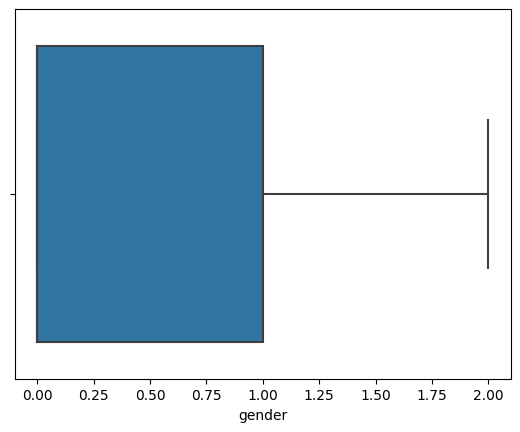

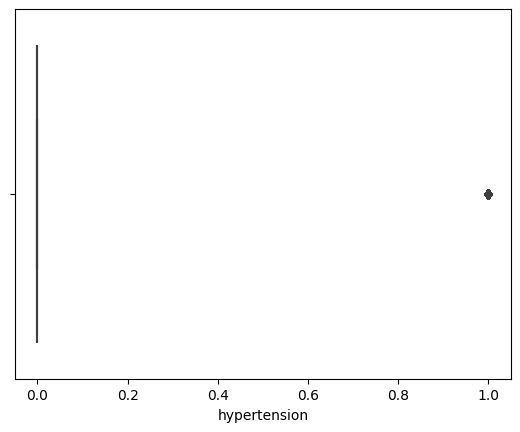

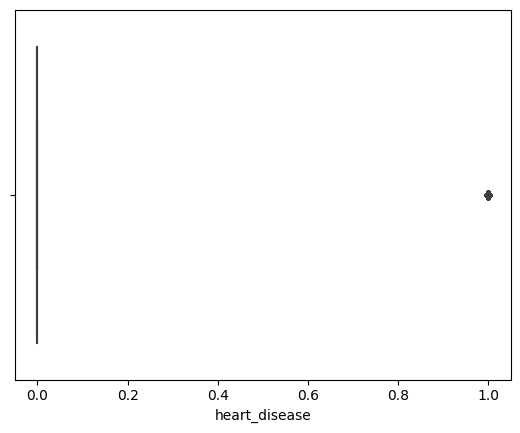

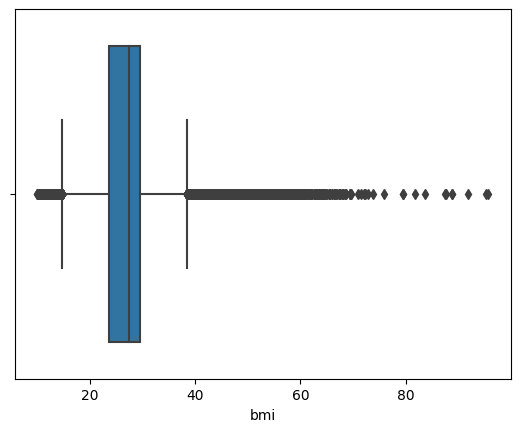

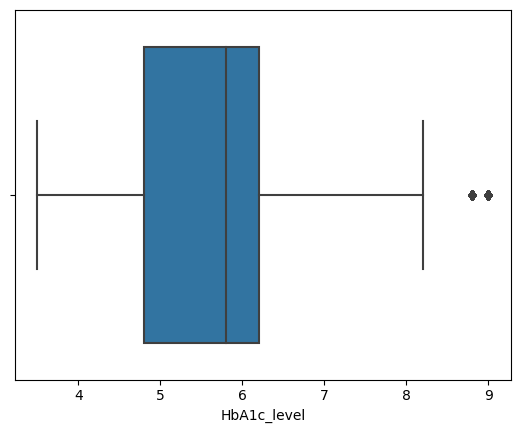

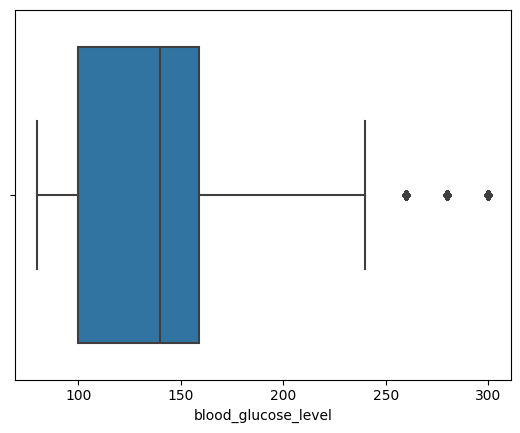

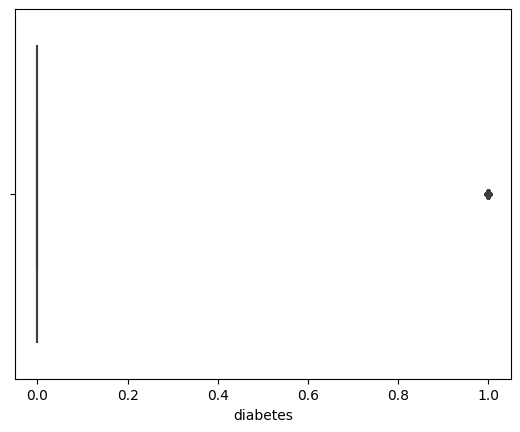

In [ ]:
import pandas as pd
import seaborn as sns

# create boxplots for each variable
for var in outlier_cols:
    sns.boxplot(x=df[var])
    plt.show()

# ***As some of the columns are categorical, we will not consider them outliers and we will work on the rest of them***

# ***Trying to remove outliers***

In [ ]:
import pandas as pd
import numpy as np

def remove_outliers(df, columns):
    for column in columns:
        # Calculating the Z-scores for the column
        z_scores = (df[column] - df[column].mean()) / df[column].std()

        # Identifying the outliers
        outliers = df[z_scores > 3]

        # Removing the outliers from the DataFrame
        df = df.drop(outliers.index)

    return df

# Removing the outliers from the `bmi` and `HbA1c_level` columns
df = remove_outliers(df, ["bmi", "HbA1c_level"])

# Checking if the outliers have been removed
print(df[df["bmi"] > 3].empty)
print(df[df["HbA1c_level"] > 3].empty)


False
False


# ***Feature Analysis***

# ***Categorical Columns individual graphs***

In [ ]:
categorical_columns = ['gender', 'hypertension', 'heart_disease', 'smoking_history']


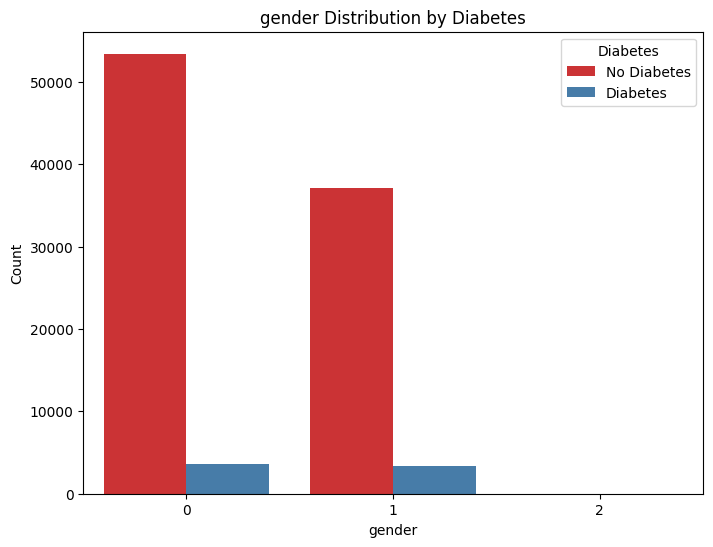

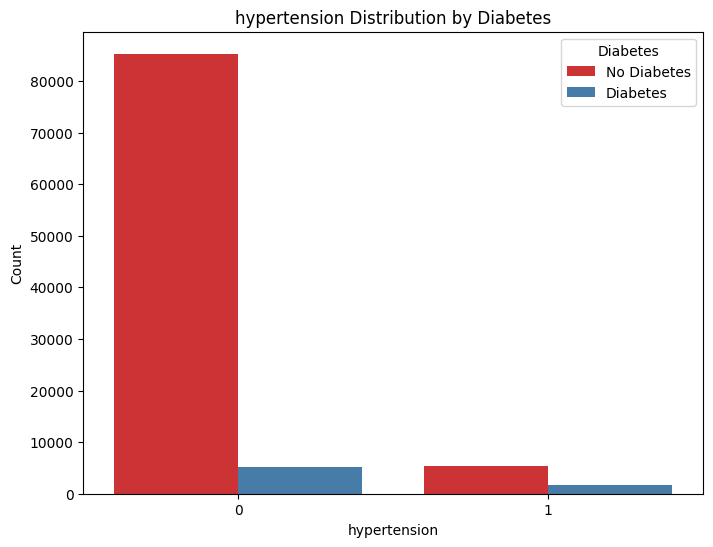

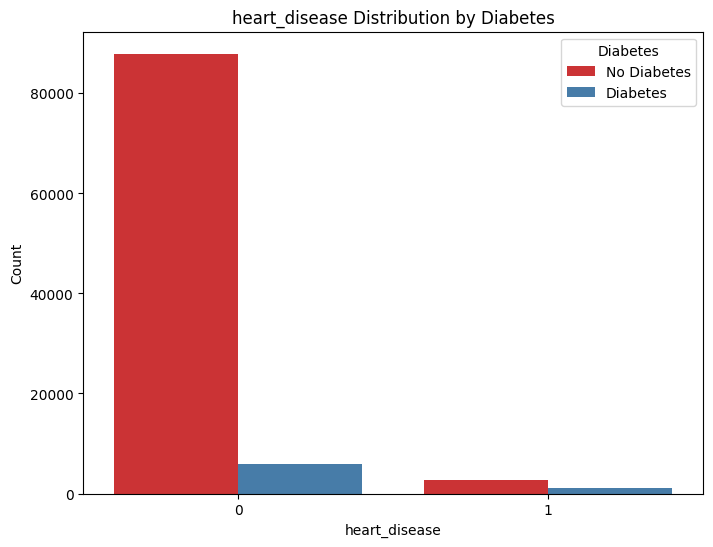

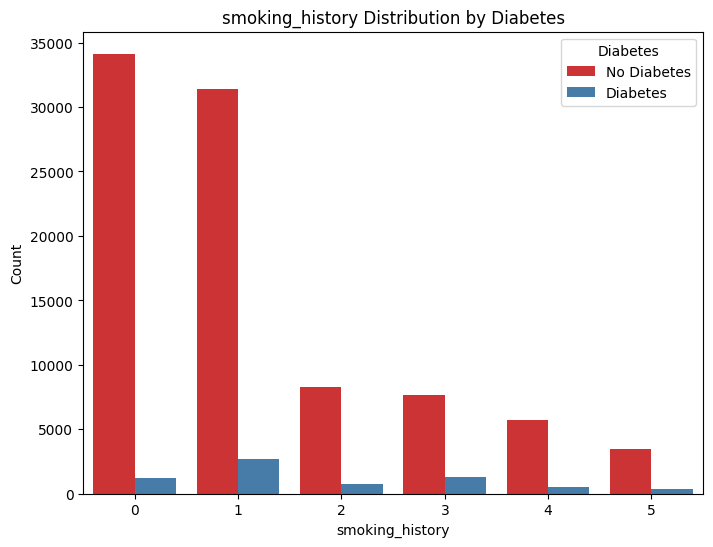

In [ ]:
for column in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=column, hue='diabetes', data=df, palette='Set1')
    plt.title(f'{column} Distribution by Diabetes')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.legend(title='Diabetes', loc='upper right', labels=['No Diabetes', 'Diabetes'])
    plt.show()

smoking_history_mapping = {
    "never" : 1,
    "No Info" : 0,
    "current" : 2,
    "former" : 3,
    "not current" : 4,
    "ever" :5
}

# ***Numerical Columns***

In [ ]:
numerical_columns = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']


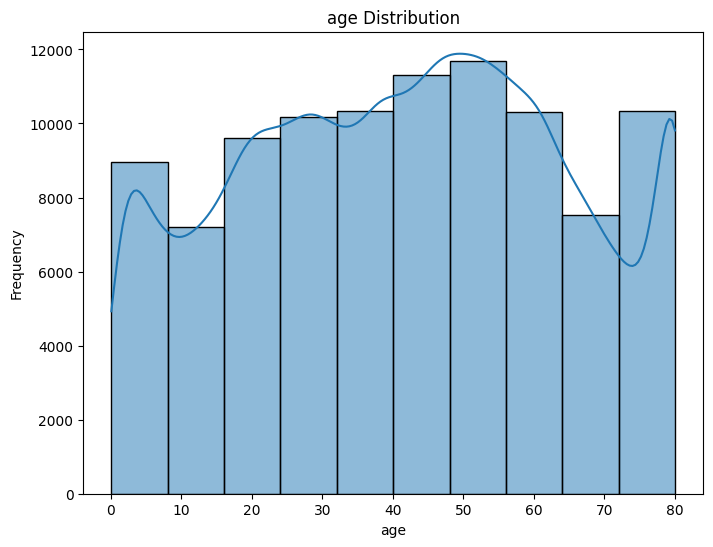

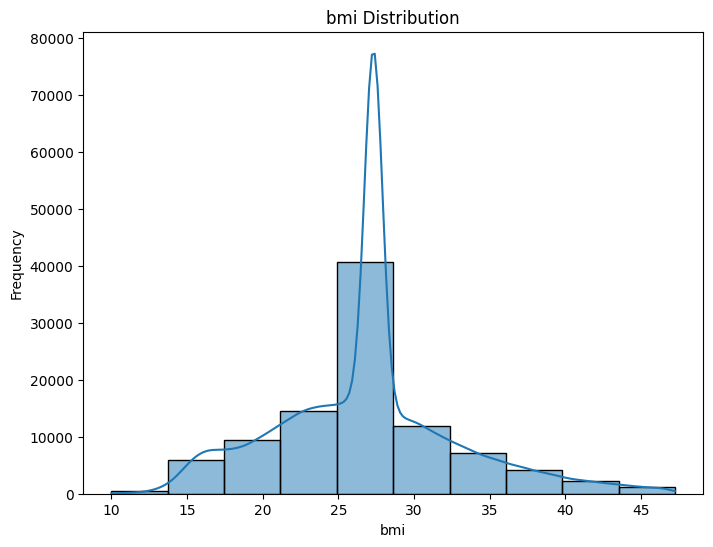

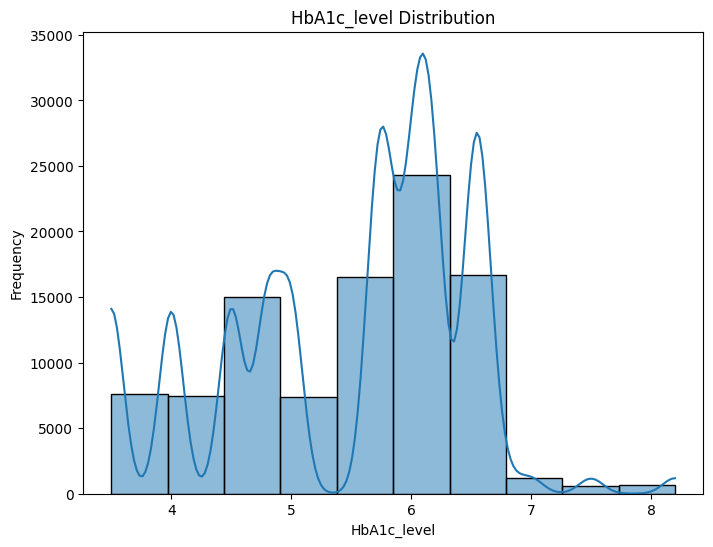

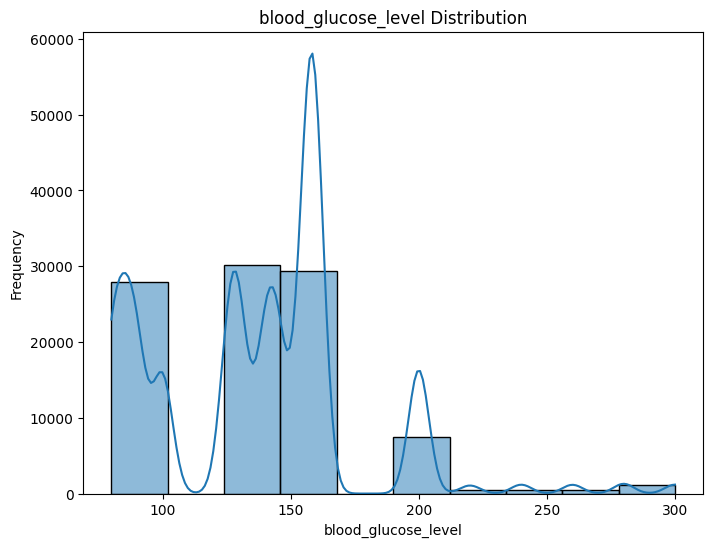

In [ ]:
for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[column], bins=10, kde=True)
    plt.title(f'{column} Distribution')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

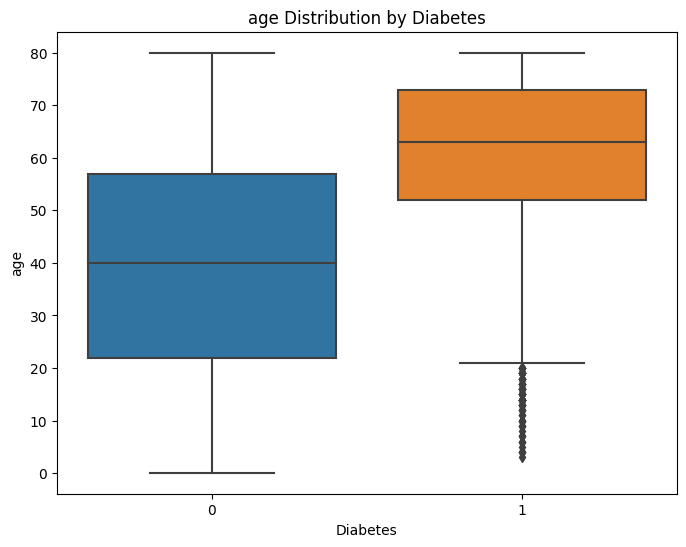

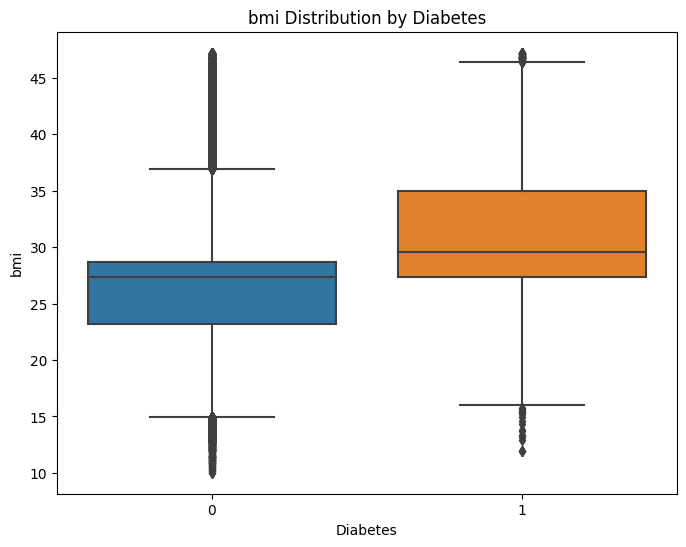

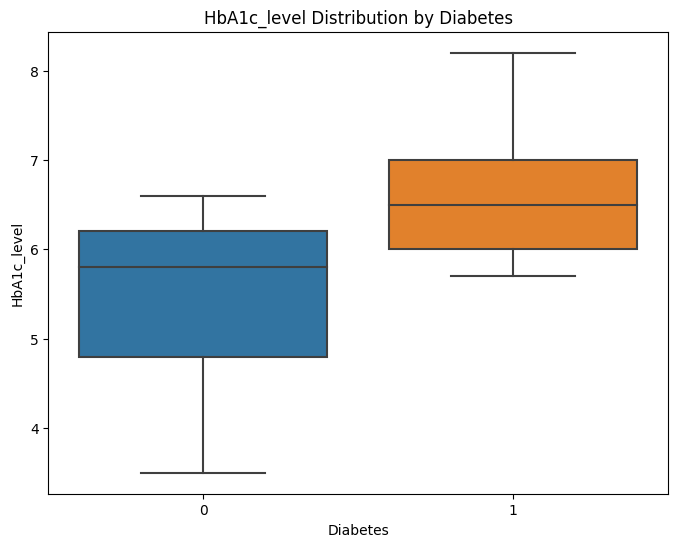

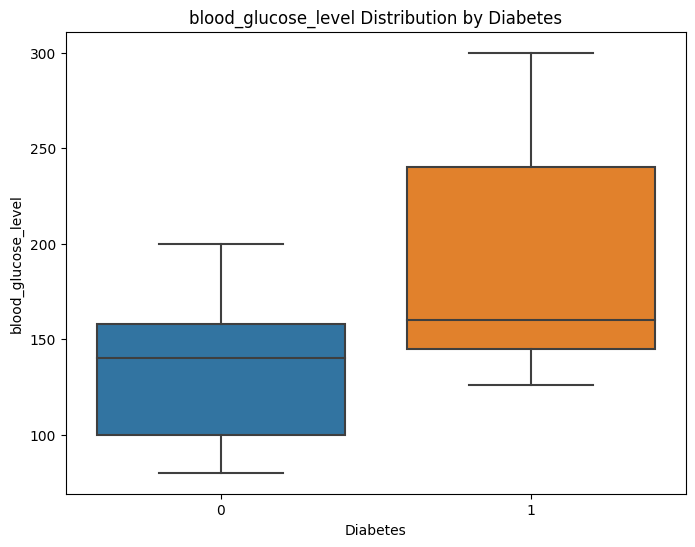

In [ ]:
for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='diabetes', y=column, data=df)
    plt.title(f'{column} Distribution by Diabetes')
    plt.xlabel('Diabetes')
    plt.ylabel(column)
    plt.show()

In [ ]:
#sns.pairplot(df, hue='diabetes', diag_kind='hist', palette='coolwarm')
#plt.suptitle('Pair Plot of Numerical Columns by Diabetes', y=1.02)
#plt.show()

# ***Correlation***

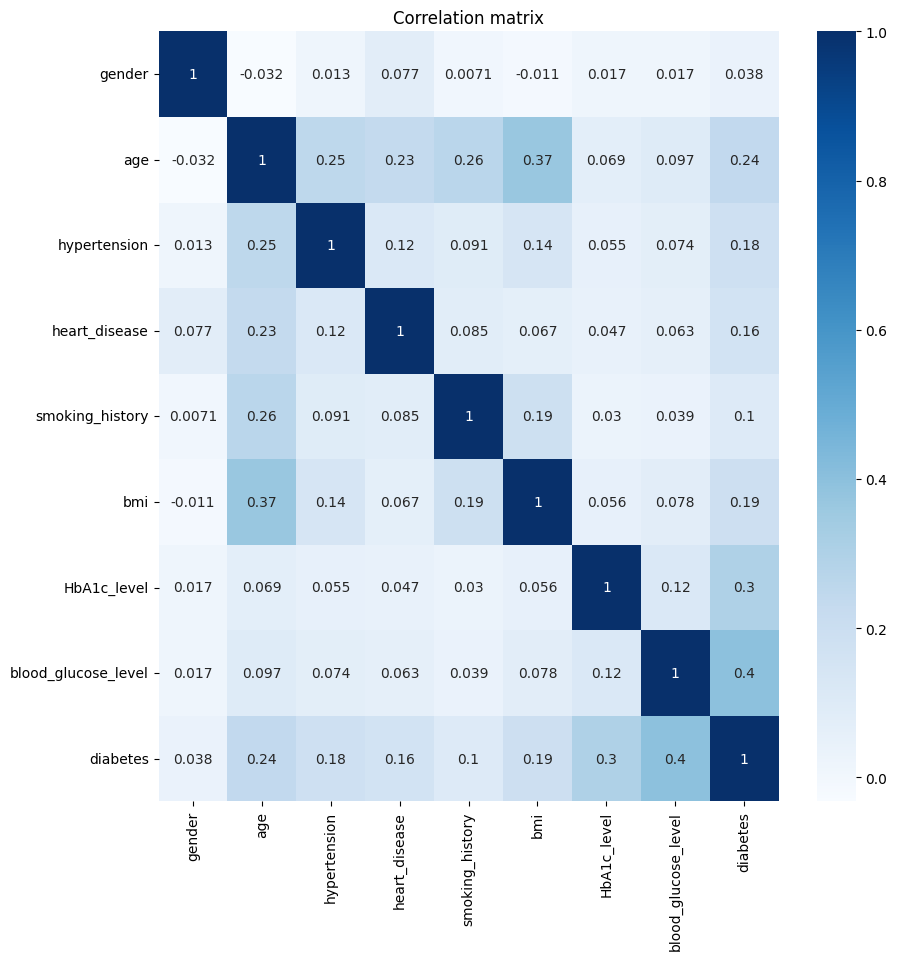

In [ ]:
# Calculate the correlation matrix
corr = df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(corr, cmap='Blues', annot=True)
plt.title('Correlation matrix')
plt.show()

In [ ]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,1,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,1,27.32,5.7,158,0
3,0,36.0,0,0,2,23.45,5.0,155,0
4,1,76.0,1,1,2,20.14,4.8,155,0


# ***Information Gain to check the most important Features***

In [ ]:
from sklearn.feature_selection import mutual_info_classif

X = df.drop('diabetes', axis=1)
y = df['diabetes']

# Calculate the information gain for each feature
info_gain = mutual_info_classif(X, y)

# Print the information gain for each feature
for i in range(len(info_gain)):
    print(f"Feature {i}: {info_gain[i]:.3f}")

Feature 0: 0.009
Feature 1: 0.035
Feature 2: 0.012
Feature 3: 0.008
Feature 4: 0.010
Feature 5: 0.021
Feature 6: 0.097
Feature 7: 0.100


In [ ]:
df['diabetes'].value_counts()

0    90572
1     6863
Name: diabetes, dtype: int64

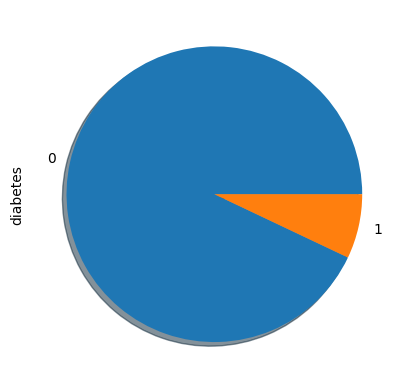

In [ ]:
df['diabetes'].value_counts().plot.pie(shadow=True)
plt.show()

In [ ]:
df.shape

(97435, 9)

# ***Random UnderSampling***

In [ ]:
pip install imblearn --upgrade

In [ ]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler


### Defing the X and Y axis

X = df.drop(['diabetes'],axis = 1)
y = df['diabetes']

# Apply Min-Max scaling to the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


# Resample the whole dataset
undersampler = RandomUnderSampler(sampling_strategy='majority', random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X_scaled, y)

# Split the resampled dataset into training, testing, and validation sets
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.4, random_state=42, stratify=y_resampled
)

X_val, X_test, y_val, y_test = train_test_split(
    X_train, y_train, test_size=0.5, random_state=42, stratify=y_train
)


# Display class distribution
print("Class distribution after resampling:", Counter(y_resampled))

# Display class distribution in training set
print("Class distribution in training set:", Counter(y_train))

# Display class distribution in test set
print("Class distribution in test set:", Counter(y_test))

# Display class distribution in test set
print("Class distribution in val set:", Counter(y_val))



ImportError: ignored

# ***Logistic Regression***

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Create a Logistic Regression model
model = LogisticRegression()

# Train the model on the undersampled training data
model.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred = model.predict(X_val)

# Calculate the classification report for the validation set
class_report_val = classification_report(y_val, y_val_pred)

print("Classification Report for Validation Set:\n", class_report_val)

Classification Report for Validation Set:
               precision    recall  f1-score   support

           0       0.87      0.86      0.87      2058
           1       0.87      0.87      0.87      2059

    accuracy                           0.87      4117
   macro avg       0.87      0.87      0.87      4117
weighted avg       0.87      0.87      0.87      4117



# ***Overfitting Check***

In [ ]:
from sklearn.metrics import accuracy_score
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)

# Calculate accuracy on both sets
accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_val = accuracy_score(y_val, y_val_pred)

print("Accuracy on Training Set:", accuracy_train)
print("Accuracy on Validation Set:", accuracy_val)

# Check for overfitting
if accuracy_train > accuracy_val:
    print("The model might be overfitting.")
else:
    print("The model is performing reasonably on both sets.")

Accuracy on Training Set: 0.8718882817243473
Accuracy on Validation Set: 0.8664075783337382
The model might be overfitting.


# ***Confusion and ROC-AUC ***

Selected Feature Indices: [1 5 6 7]
ROC AUC: 0.9491233112963495


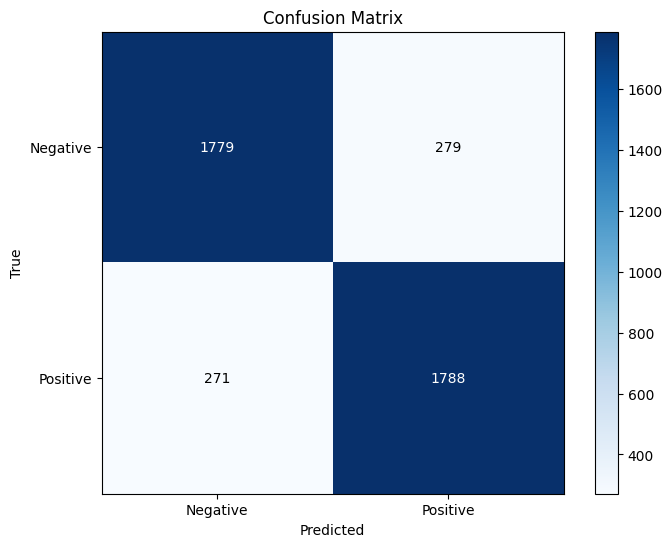

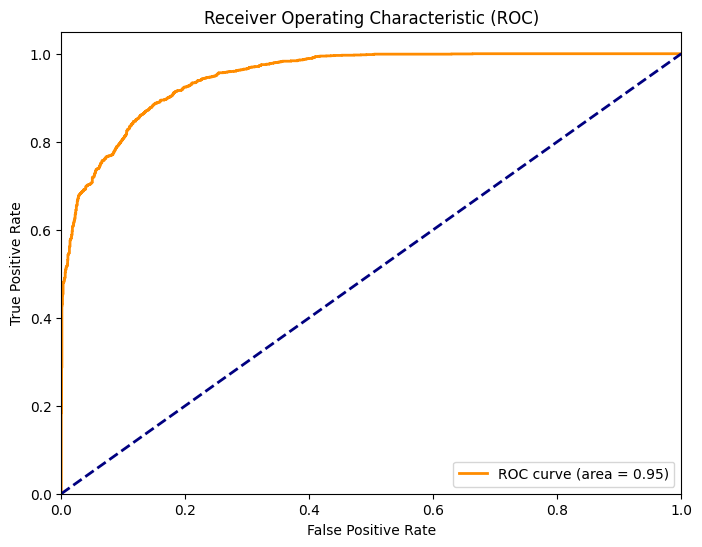

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.feature_selection import SelectFromModel

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_val, y_val_pred)

# Calculate the classification report for the validation set
class_report_val = classification_report(y_val, y_val_pred)

# Calculate ROC curve and AUC
y_val_prob = model.predict_proba(X_val)[:, 1]
fpr, tpr, _ = roc_curve(y_val, y_val_prob)
roc_auc = auc(fpr, tpr)

# Get feature importances using SelectFromModel
feature_selector = SelectFromModel(model, prefit=True)
selected_features = feature_selector.get_support()
selected_feature_indices = np.where(selected_features)[0]

# Print selected feature indices and ROC AUC
print("Selected Feature Indices:", selected_feature_indices)
print("ROC AUC:", roc_auc)

# Plot the confusion matrix with values
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Negative', 'Positive'])
plt.yticks(tick_marks, ['Negative', 'Positive'])
plt.xlabel("Predicted")
plt.ylabel("True")

# Add values to the confusion matrix
for i in range(2):
    for j in range(2):
        plt.text(j, i, str(conf_matrix[i, j]), ha='center', va='center', color='white' if conf_matrix[i, j] > conf_matrix.max() / 2 else 'black')

plt.show()

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# ***Decision Tree with confusion matrix and ROC-AUX***

              precision    recall  f1-score   support

           0       0.92      0.86      0.89      2058
           1       0.87      0.92      0.89      2059

    accuracy                           0.89      4117
   macro avg       0.89      0.89      0.89      4117
weighted avg       0.89      0.89      0.89      4117

Feature Importances: [3.65990455e-04 1.85019889e-01 2.87548351e-02 2.48043899e-02
 1.38317918e-02 7.43168180e-02 3.74576052e-01 2.98330233e-01]
ROC AUC: 0.9654400718172511


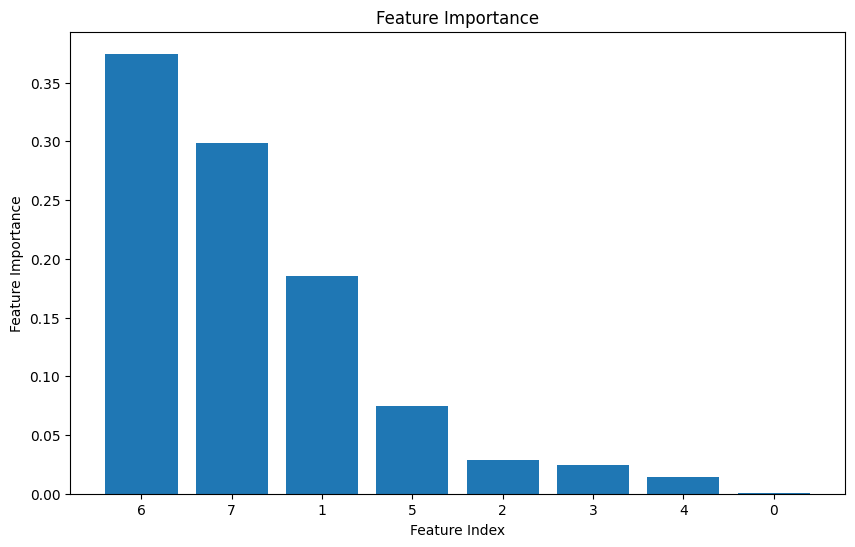

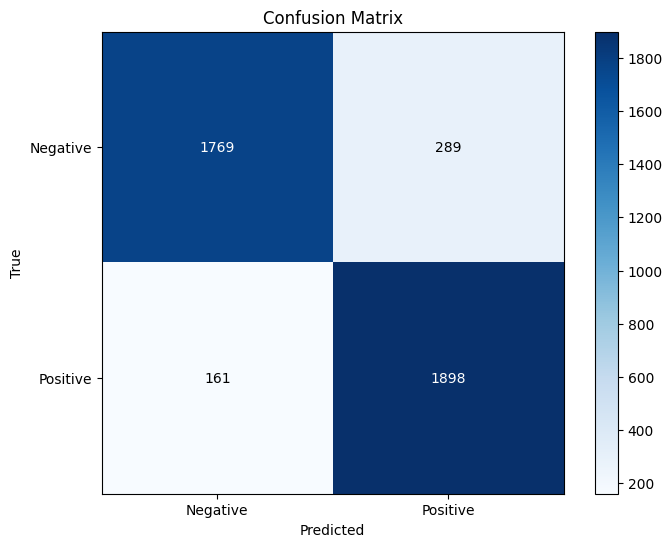

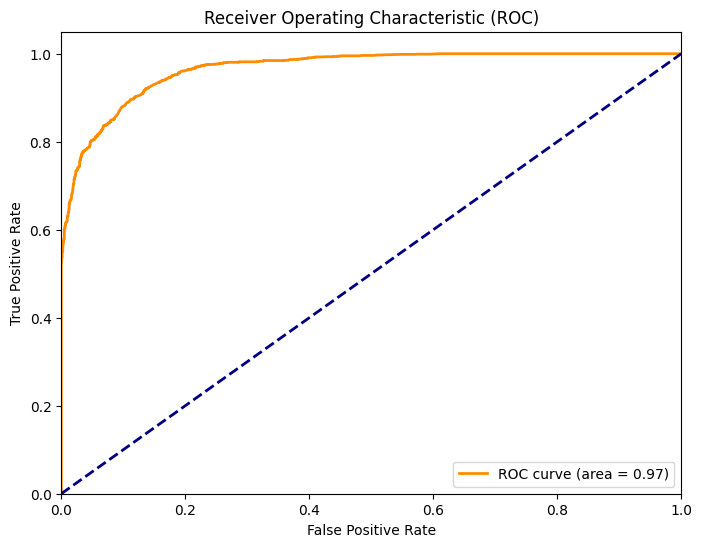

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.feature_selection import SelectFromModel


import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

def reduce_overfitting(model, X_train, y_train, X_val, y_val):

  # Set the maximum depth of the tree to a lower value.
  model.max_depth = 4

  # Increase the minimum number of samples required to split a node.
  model.min_samples_split = 10

  # Use pruning to remove parts of the tree that are not important.
  model.ccp_alpha = 0.001

  # Fit the model on the training data again.
  model.fit(X_train, y_train)

  # Make predictions on the validation set.
  y_val_pred = model.predict(X_val)

  # Calculate the confusion matrix.
  conf_matrix = confusion_matrix(y_val, y_val_pred)

  # Calculate the classification report for the validation set.
  class_report_val = classification_report(y_val, y_val_pred)

  return model, conf_matrix, class_report_val

# Apply the function to reduce overfitting
model, conf_matrix, class_report_val = reduce_overfitting(
    model=model,
    X_train=X_train,
    y_train=y_train,
    X_val=X_val,
    y_val=y_val)



print(class_report_val)
# Calculate ROC curve and AUC
y_val_prob = model.predict_proba(X_val)[:, 1]
fpr, tpr, _ = roc_curve(y_val, y_val_prob)
roc_auc = auc(fpr, tpr)

# Print selected feature importances and ROC AUC
# Get feature importances and indices
feature_importances = model.feature_importances_
sorted_feature_indices = np.argsort(feature_importances)[::-1]

# Print selected feature importances and ROC AUC
print("Feature Importances:", feature_importances)
print("ROC AUC:", roc_auc)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), feature_importances[sorted_feature_indices])
plt.xticks(range(X.shape[1]), sorted_feature_indices)
plt.xlabel("Feature Index")
plt.ylabel("Feature Importance")
plt.title("Feature Importance")
plt.show()

# Plot the confusion matrix with values
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Negative', 'Positive'])
plt.yticks(tick_marks, ['Negative', 'Positive'])
plt.xlabel("Predicted")
plt.ylabel("True")

# Add values to the confusion matrix
for i in range(2):
    for j in range(2):
        plt.text(j, i, str(conf_matrix[i, j]), ha='center', va='center', color='white' if conf_matrix[i, j] > conf_matrix.max() / 2 else 'black')

plt.show()

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


# ***Random Forest***

              precision    recall  f1-score   support

           0       0.92      0.86      0.89      2058
           1       0.87      0.92      0.90      2059

    accuracy                           0.89      4117
   macro avg       0.89      0.89      0.89      4117
weighted avg       0.89      0.89      0.89      4117

Selected Feature Indices: [1 6 7]
ROC AUC: 0.965694235787703


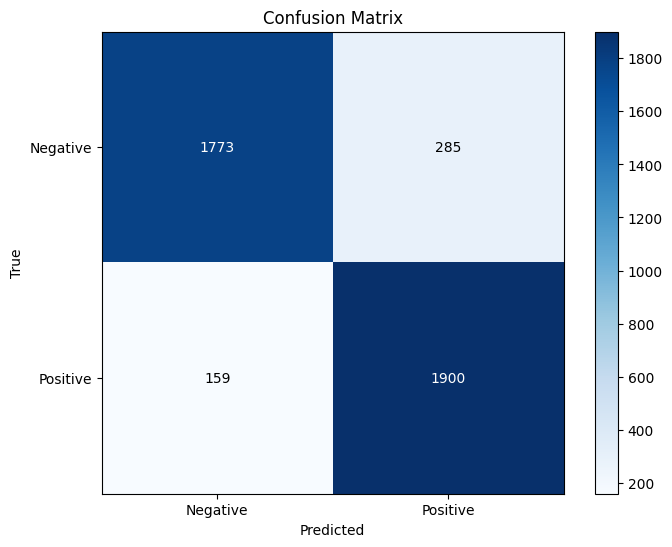

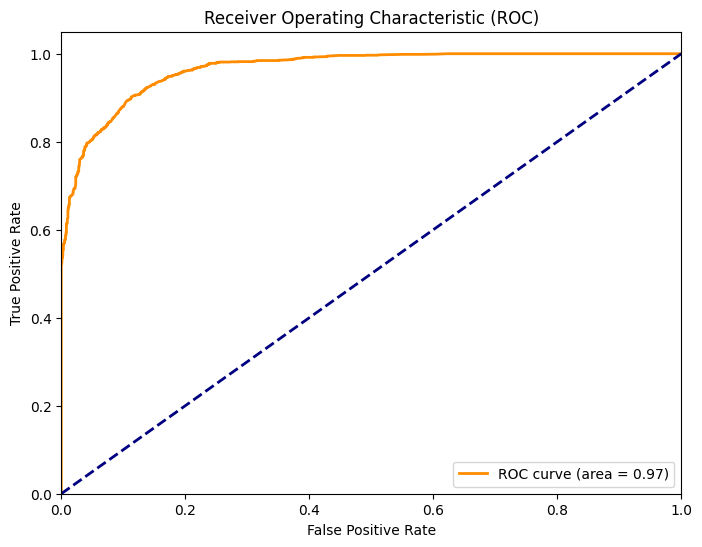

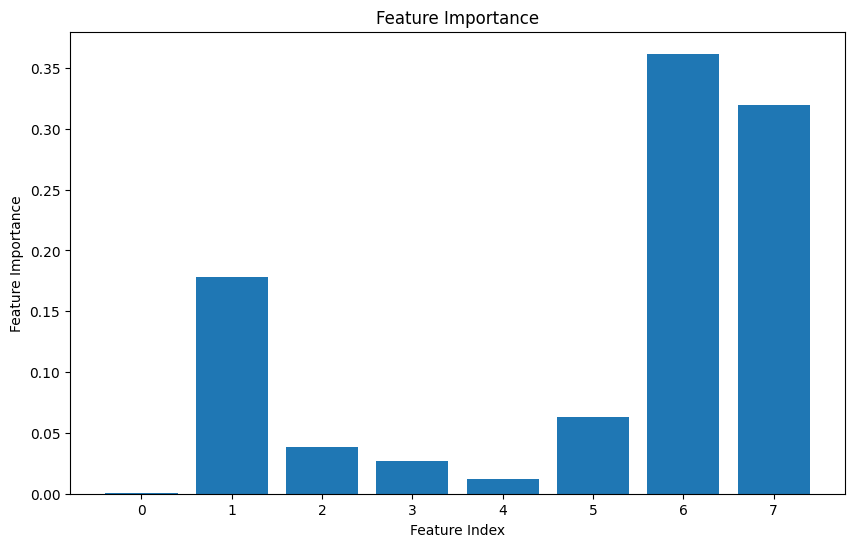

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.feature_selection import SelectFromModel



import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

def reduce_overfitting(model, X_train, y_train, X_val, y_val):

  # Reduce the number of trees.
  model.n_estimators = 100

  # Increase the minimum number of samples required to split a node.
  model.min_samples_split = 10

  # Use pruning to remove parts of the tree that are not important.
  model.ccp_alpha = 0.001

  # Fit the model on the training data again.
  model.fit(X_train, y_train)

  # Make predictions on the validation set.
  y_val_pred = model.predict(X_val)

  # Calculate the confusion matrix.
  conf_matrix = confusion_matrix(y_val, y_val_pred)

  # Calculate the classification report for the validation set.
  class_report_val = classification_report(y_val, y_val_pred)

  return model, conf_matrix, class_report_val

# Apply the function to reduce overfitting
model, conf_matrix, class_report_val = reduce_overfitting(
    model=model,
    X_train=X_train,
    y_train=y_train,
    X_val=X_val,
    y_val=y_val)

print(class_report_val)

# Calculate ROC curve and AUC
y_val_prob = model.predict_proba(X_val)[:, 1]
fpr, tpr, _ = roc_curve(y_val, y_val_prob)
roc_auc = auc(fpr, tpr)

# Get feature importances using SelectFromModel
feature_selector = SelectFromModel(model, prefit=True)
selected_features = feature_selector.get_support()
selected_feature_indices = np.where(selected_features)[0]

# Print selected feature indices and ROC AUC
print("Selected Feature Indices:", selected_feature_indices)
print("ROC AUC:", roc_auc)

# Plot the confusion matrix with numbers
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Negative', 'Positive'])
plt.yticks(tick_marks, ['Negative', 'Positive'])
plt.xlabel("Predicted")
plt.ylabel("True")

# Add numbers to the confusion matrix
for i in range(2):
    for j in range(2):
        plt.text(j, i, str(conf_matrix[i, j]), ha='center', va='center', color='white' if conf_matrix[i, j] > conf_matrix.max() / 2 else 'black')

plt.show()

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), model.feature_importances_)
plt.xticks(range(X.shape[1]), range(X.shape[1]))
plt.xlabel("Feature Index")
plt.ylabel("Feature Importance")
plt.title("Feature Importance")
plt.show()


gender	age	hypertension	heart_disease	smoking_history	bmi	HbA1c_level	blood_glucose_level	diabetes

# ***Overfitting Check***

In [ ]:
from sklearn.metrics import accuracy_score
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)

# Calculate accuracy on both sets
accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_val = accuracy_score(y_val, y_val_pred)

print("Accuracy on Training Set:", accuracy_train)
print("Accuracy on Validation Set:", accuracy_val)

# Check for overfitting
if accuracy_train > accuracy_val:
    print("The model might be overfitting.")
else:
    print("The model is performing reasonably on both sets.")

Accuracy on Training Set: 0.9993928354584092
Accuracy on Validation Set: 0.9995142093757591
The model is performing reasonably on both sets.


# ***The End***